# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Corrigir data types no filtro e cidade Belo Horizonte.

Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [2]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [3]:
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

**Aplicando o One Hot Encoder**

Subistituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [4]:
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [5]:
data.head()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio,estado__MG,estado__RJ,estado__RS,estado__SP,cidade__Belo Horizonte,cidade__Campinas,cidade__Porto Alegre,cidade__Rio De Janeiro,cidade__São Paulo
0,70,2,1,1,7,1,1,3300,2065,211,42,0,0,0,1,0,0,0,0,1
1,320,4,4,0,20,1,0,4960,1200,1750,63,0,0,0,1,0,0,0,0,1
2,80,1,1,1,6,1,0,2800,1000,0,41,0,0,1,0,0,0,1,0,0
3,51,2,1,0,2,1,0,1112,270,22,17,0,0,1,0,0,0,1,0,0
4,25,1,1,0,1,0,0,800,0,25,11,0,0,0,1,0,0,0,0,1


## Detecção de Outliers, Machine Learning, Deploy

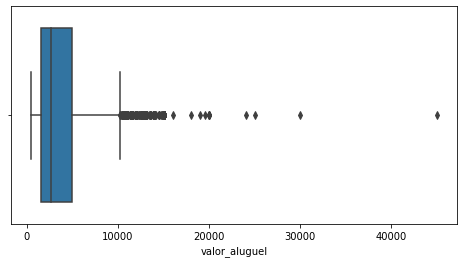

In [6]:
plt.figure(figsize=[8,4])
sns.boxplot(x=data['valor_aluguel'])
plt.show()

In [7]:
q1 = data['valor_aluguel'].quantile(.25)
q3 = data['valor_aluguel'].quantile(.75)
q1, q3

(1530.0, 5000.0)

In [8]:
iqr = q3 - q1

In [9]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-3675.0, 10205.0)

In [10]:
data_clean = data[(data['valor_aluguel'] >= lower) & (data['valor_aluguel'] <= upper)]

In [11]:
data_clean.describe()

,area,num_quartos,num_banheiros,garagem,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio,estado__MG,estado__RJ,estado__RS,estado__SP,cidade__Belo Horizonte,cidade__Campinas,cidade__Porto Alegre,cidade__Rio De Janeiro,cidade__São Paulo
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9.977000e+03,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,134.480204,2.415957,2.092413,1.466573,5.243460,0.774882,0.235341,3221.233337,1.068422e+03,301.399218,43.940664,0.117570,0.144833,0.117169,0.620427,0.117570,0.083993,0.117169,0.144833,0.536434
std,550.667527,1.122319,1.289368,1.471634,5.842044,0.417681,0.424233,2296.025341,1.585605e+04,3190.804271,32.114269,0.322115,0.351950,0.321638,0.485305,0.322115,0.277391,0.321638,0.351950,0.498696
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,450.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1500.000000,1.910000e+02,34.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2500.000000,5.500000e+02,110.000000,33.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,4250.000000,1.119000e+03,307.000000,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46335.000000,10.000000,10.000000,12.000000,301.000000,1.000000,1.000000,10200.000000,1.117000e+06,313700.000000,178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


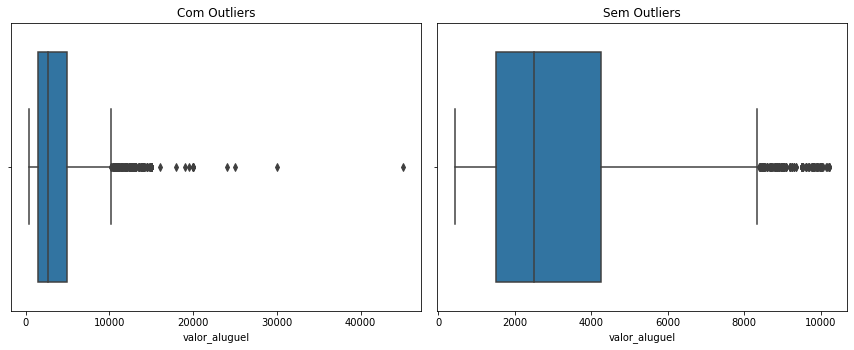

In [12]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.title("Com Outliers")
sns.boxplot(x=data['valor_aluguel'])

plt.subplot(1,2,2)
plt.title("Sem Outliers")
sns.boxplot(x=data_clean['valor_aluguel'])

plt.tight_layout(pad=1.2)
plt.show()

In [13]:
data = data_clean

## Machine Learning

In [14]:
y = data['valor_aluguel']
x = data.drop(['valor_aluguel'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
def metricas(y_test, preds):
    print('MAE:', mean_absolute_error(y_test,preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,preds)))
    print('R2:', r2_score(y_test,preds))


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

### Cálculo da baseline:

In [18]:
from sklearn.dummy import DummyRegressor

In [19]:
model = DummyRegressor(strategy='median')

In [20]:
model.fit(X_train,Y_train)
preds = model.predict(X_test)
metricas(Y_test,preds)

MAE: 1738.7097528390113
RMSE: 2436.9268990039163
R2: -0.10275766194340163


In [21]:
acc = []
acc.append(['BAS',r2_score(Y_test,preds)])

### Treino de modelo de Regressão

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train,Y_train)
preds = model.predict(X_test)


In [24]:
metricas(Y_test, preds)

MAE: 236.9766840878787
RMSE: 367.3243382202199
R2: 0.9749449952113726


In [25]:
acc.append(['LIR',r2_score(Y_test,preds)])

### Treino de Árvores de decisão

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

In [28]:
metricas(Y_test,preds)

MAE: 74.00116900467602
RMSE: 268.54284718000423
R2: 0.9866087148248661


In [29]:
acc.append(['DTR',r2_score(Y_test,preds)])

### Treino de Florestas Aleatórias

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

In [33]:
metricas(Y_test,preds)

MAE: 70.81153011048552
RMSE: 203.22581538273494
R2: 0.9923307511510714


In [34]:
acc.append(['RFR',r2_score(Y_test,preds)])

### Treino de KNN Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
model = KNeighborsRegressor()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

In [38]:
metricas(Y_test,preds)

MAE: 687.2233800935204
RMSE: 1064.473528902497
R2: 0.7895907577438037


In [39]:
acc.append(['KNN',r2_score(Y_test,preds)])

In [40]:
acc

[['BAS', -0.10275766194340163],
 ['LIR', 0.9749449952113726],
 ['DTR', 0.9866087148248661],
 ['RFR', 0.9923307511510714],
 ['KNN', 0.7895907577438037]]

## Pycaret

In [41]:
from pycaret.regression import *

In [42]:
numeric_features = ['num_quartos', 'num_banheiros', 'garagem', 'num_andares', 'aceita_animais', 'mobilia']

In [46]:
s = setup(data,
         target = 'valor_aluguel',
         numeric_features=numeric_features,
         log_experiment=True,                # O experimento será armazenado e pode ser acessado com o MLFlow
         experiment_name='exp_DS')

,Description,Value
0,session_id,3412
1,Target,valor_aluguel
2,Original Data,"(9977, 20)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6983, 16)"


Existe um problema ao testar os dados da maneira habitual (`train_test_split`), porque no processo aleatório de separação de dados para treino e teste, pode haver seleção de dados ideais, ou pode haver seleção de dados ruins para o treino. Assim, ao executar vários *splits*, pode haver variância entre os resultados dos testes, pois a cada vez está sendo usado uma parcela diferente dos dados para treino.

Ao usa o **Cross Validation** todos os dados são usados para treino, pois acontece um *rodízio*, e há várias testagens seguidas até utilizar todos os dados. O parâmetro `fold` representa o número de partes em que o conjunto de dados será divido. Então o Cross Validation diminui a variabilidade nos resultados de testes, deixando-os mais consistentes.

In [47]:
best = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,82.4514,43967.7887,207.5674,0.9916,0.0826,0.0352,0.1440
et,Extra Trees Regressor,69.2351,46375.1489,213.4919,0.9911,0.0831,0.0297,0.9140
gbr,Gradient Boosting Regressor,97.8814,48659.6419,218.3987,0.9907,0.0898,0.0421,0.4980
rf,Random Forest Regressor,74.8559,53299.3781,229.2779,0.9898,0.0890,0.0320,1.2840
dt,Decision Tree Regressor,80.1138,90603.8911,300.0980,0.9826,0.1092,0.0338,0.0500
llar,Lasso Least Angle Regression,261.1679,157402.2092,396.1067,0.9698,0.1336,0.0926,0.0300
omp,Orthogonal Matching Pursuit,269.4422,172721.8590,415.1294,0.9668,0.1370,0.0867,0.0220
ada,AdaBoost Regressor,529.0711,380999.1494,617.0725,0.9267,0.3042,0.2825,0.3260
lr,Linear Regression,240.8279,663420.8031,618.8593,0.8724,0.1346,0.0848,0.0240
lar,Least Angle Regression,240.8370,663395.0004,618.8459,0.8724,0.1346,0.0848,0.0280


In [48]:
light= create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,85.1392,47537.1732,218.0302,0.9911,0.0897,0.0337
1,77.6017,26487.1286,162.7487,0.9949,0.0780,0.0353
2,81.3368,43009.9737,207.3885,0.9914,0.0807,0.0358
3,87.1500,64524.7548,254.0172,0.9878,0.0940,0.0374
4,81.0292,38279.9131,195.6525,0.9926,0.0705,0.0340
Mean,82.4514,43967.7887,207.5674,0.9916,0.0826,0.0352
SD,3.3492,12443.2486,29.7246,0.0023,0.0084,0.0013


Otimizando e *tunnando* o modelo

In [57]:
tunned_light = tune_model(light, fold=8)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,109.5801,59626.8218,244.1860,0.9893,0.1108,0.0481
1,100.8422,36304.8440,190.5383,0.9929,0.0904,0.0414
2,104.7249,39858.8825,199.6469,0.9922,0.0838,0.0450
3,96.1589,30014.6435,173.2473,0.9941,0.0855,0.0445
4,103.3201,60530.9011,246.0303,0.9876,0.0941,0.0430
5,111.1684,87015.4953,294.9839,0.9837,0.1077,0.0492
6,102.3347,41667.9863,204.1274,0.9920,0.0825,0.0434
7,102.3418,43606.5719,208.8219,0.9918,0.0779,0.0431
Mean,103.8089,49828.2683,220.1978,0.9904,0.0916,0.0447
SD,4.4749,17224.9780,36.6227,0.0032,0.0112,0.0025


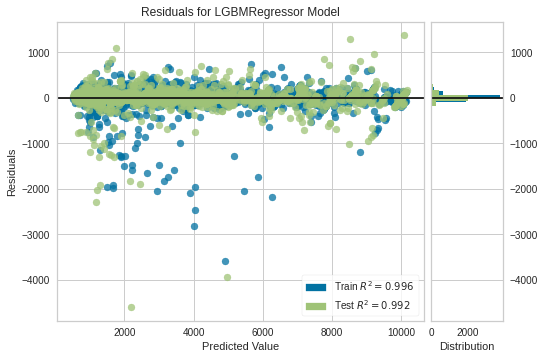

In [54]:
plot_model(light)

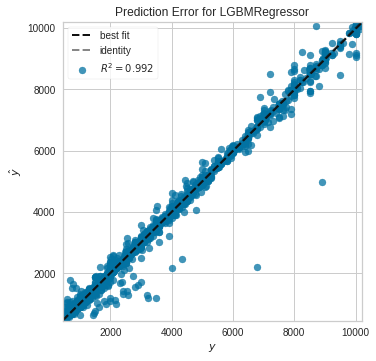

In [53]:
plot_model(light, plot ='error')

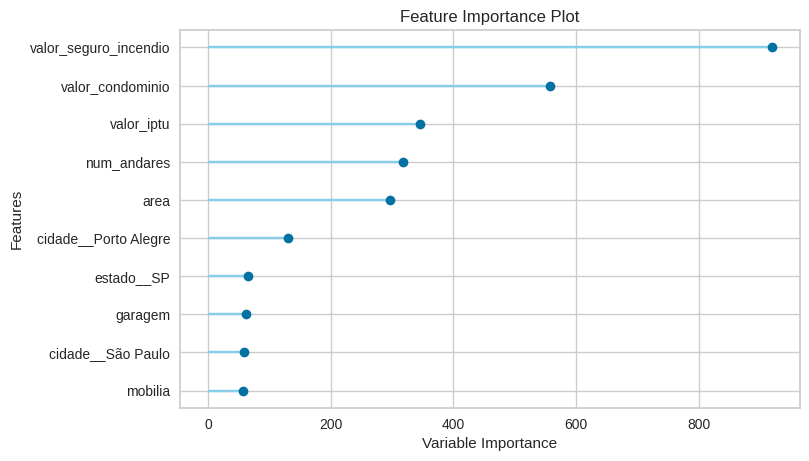

In [55]:
plot_model(light, plot ='feature')

Para finalizar, o modelo será testado com todos os dados, para ser levado para produção.

In [58]:
final_light = finalize_model(light)

In [59]:
save_model(final_light,'modelo_final_light')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['num_quartos',
                                                           'num_banheiros',
                                                           'garagem',
                                                           'num_andares',
                                                           'aceita_animais',
                                                           'mobilia'],
                                       target='valor_aluguel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy=...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
   

In [ ]:
!mlflow ui

[2021-07-31 13:17:26 -0300] [111426] [INFO] Starting gunicorn 20.1.0
[2021-07-31 13:17:26 -0300] [111426] [INFO] Listening at: http://127.0.0.1:5000 (111426)
[2021-07-31 13:17:26 -0300] [111426] [INFO] Using worker: sync
[2021-07-31 13:17:26 -0300] [111428] [INFO] Booting worker with pid: 111428
